In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly as py
import plotly.graph_objs as go
from plotly.offline import plot



In [2]:
df=pd.read_csv("C:\\Users\\abhin\\Downloads\\archive (11)\\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

x=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
train=x_train.join(y_train)
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7437,-118.19,33.94,45.0,1403.0,315.0,1111.0,311.0,3.3846,<1H OCEAN,168100.0
18140,-122.05,37.35,34.0,2494.0,375.0,1399.0,382.0,7.3753,<1H OCEAN,388100.0
18023,-121.95,37.25,34.0,2906.0,544.0,1282.0,522.0,5.5127,<1H OCEAN,268200.0
16871,-122.41,37.60,31.0,4424.0,834.0,1915.0,817.0,4.1364,NEAR OCEAN,412000.0
10082,-120.22,39.35,8.0,1872.0,281.0,203.0,71.0,4.5882,INLAND,198400.0
...,...,...,...,...,...,...,...,...,...,...
11338,-117.97,33.75,32.0,1564.0,270.0,973.0,290.0,3.7500,<1H OCEAN,190400.0
10654,-117.86,33.67,16.0,20.0,5.0,15.0,5.0,3.8750,<1H OCEAN,450000.0
15849,-122.44,37.74,52.0,2074.0,366.0,909.0,394.0,4.8382,NEAR BAY,294900.0
18690,-121.75,36.95,27.0,1580.0,303.0,1066.0,306.0,4.7071,<1H OCEAN,202700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

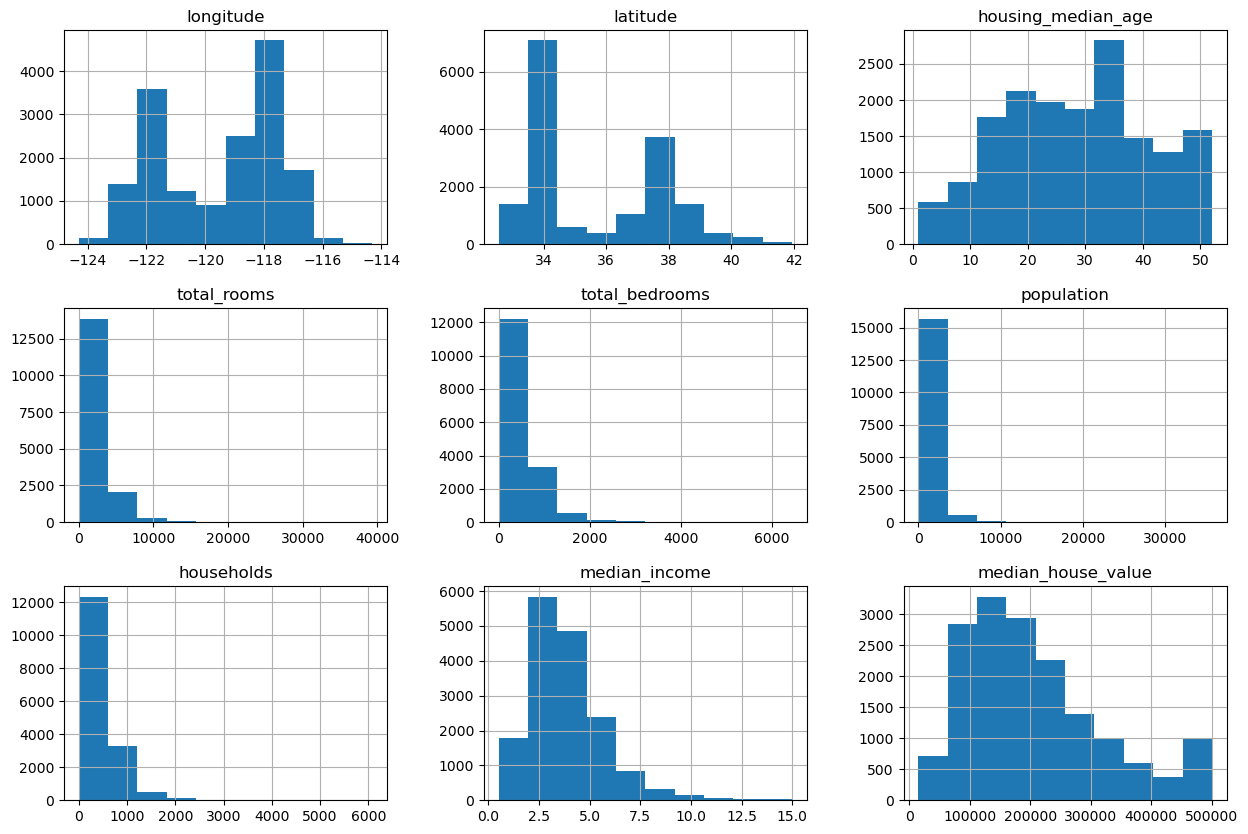

In [10]:
train.hist(figsize=(15,10))

In [11]:
train['total_rooms']=np.log(train['total_rooms']+1)
train['total_bedrooms']=np.log(train['total_bedrooms']+1)
train['population']=np.log(train['population']+1)
train['households']=np.log(train['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

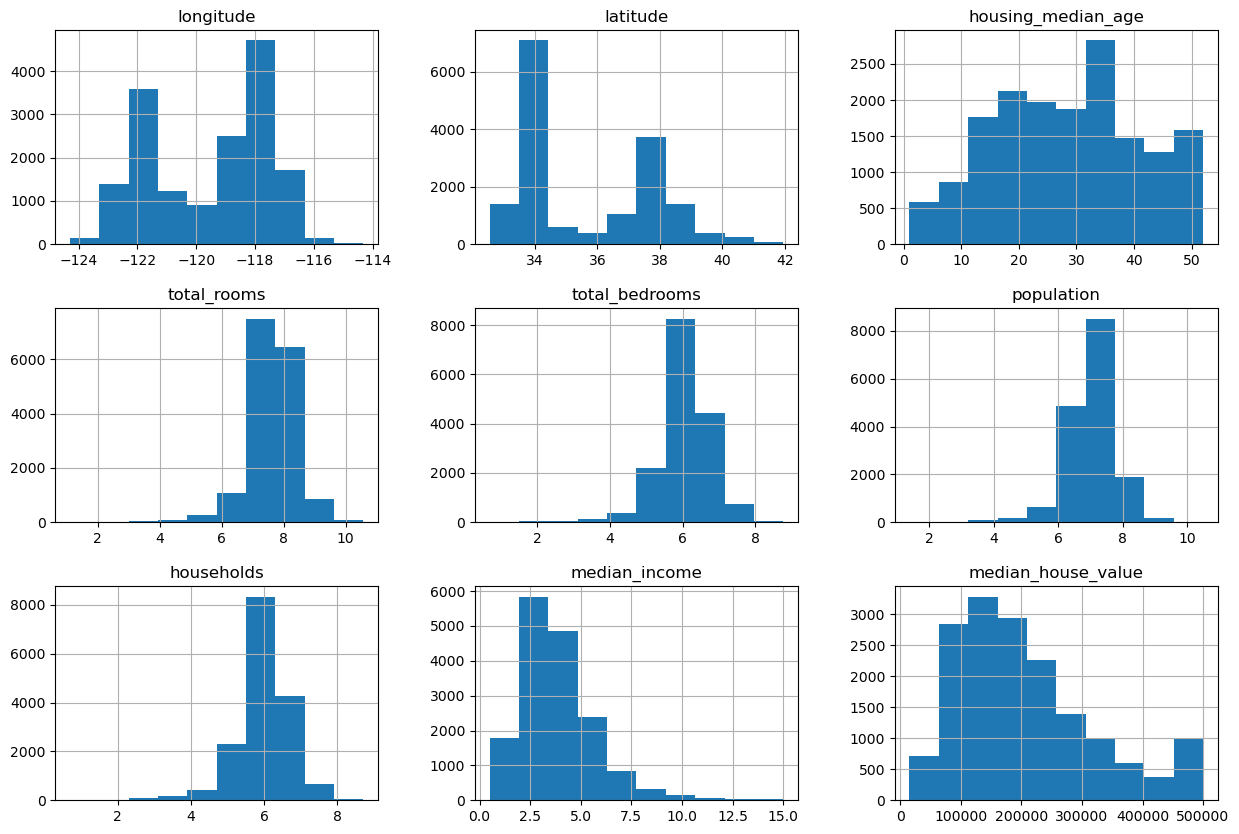

In [12]:
train.hist(figsize=(15,10))

In [13]:
train.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7190
INLAND        5218
NEAR OCEAN    2114
NEAR BAY      1821
ISLAND           3
Name: count, dtype: int64

In [14]:
train = train.join(pd.get_dummies(train['ocean_proximity'], prefix='ocean_proximity')).drop(['ocean_proximity'], axis=1)


In [15]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7437,-118.19,33.94,45.0,7.247081,5.755742,7.013915,5.743003,3.3846,168100.0,True,False,False,False,False
18140,-122.05,37.35,34.0,7.822044,5.929589,7.244228,5.948035,7.3753,388100.0,True,False,False,False,False
18023,-121.95,37.25,34.0,7.974877,6.300786,7.156956,6.259581,5.5127,268200.0,True,False,False,False,False
16871,-122.41,37.60,31.0,8.395026,6.727432,7.557995,6.706862,4.1364,412000.0,False,False,False,False,True
10082,-120.22,39.35,8.0,7.535297,5.641907,5.318120,4.276666,4.5882,198400.0,False,True,False,False,False


<Axes: xlabel='latitude', ylabel='longitude'>

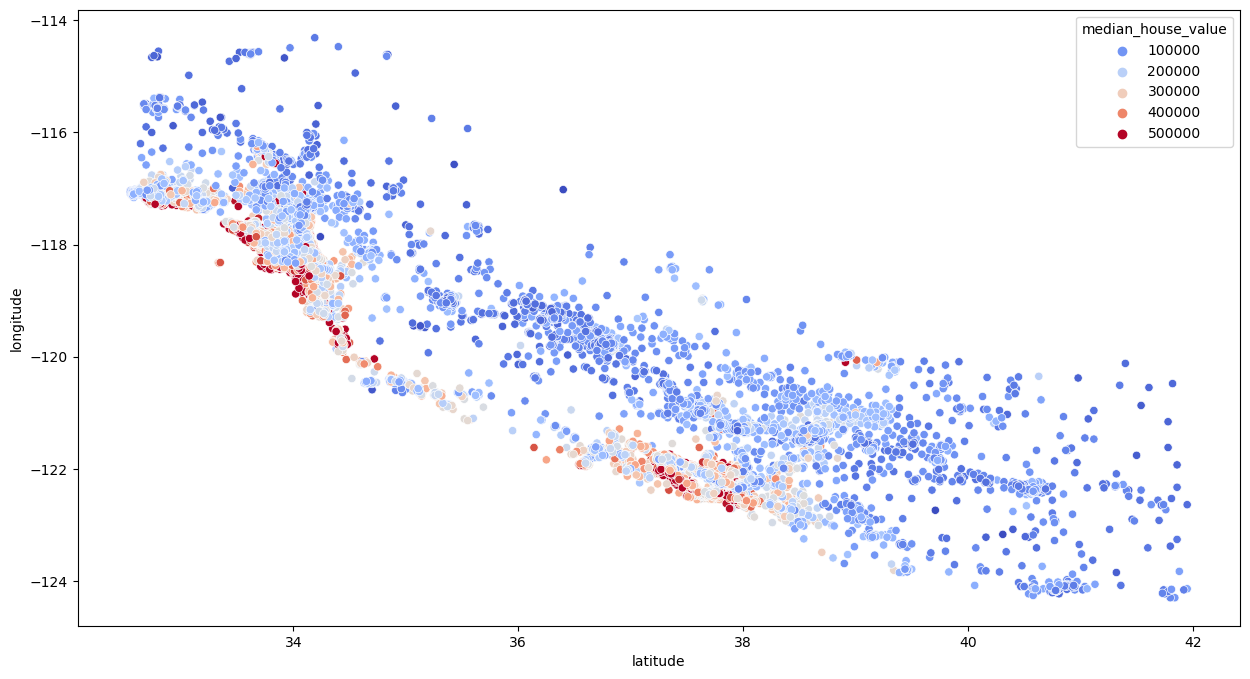

In [16]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train,hue='median_house_value',palette="coolwarm")

In [17]:
train['bedroom_ratio']=train['total_bedrooms']/train['total_rooms']
train['household_rooms']=train['total_rooms']/train['households']
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,household_rooms
7437,-118.19,33.94,45.0,7.247081,5.755742,7.013915,5.743003,3.3846,168100.0,True,False,False,False,False,0.794215,1.261897
18140,-122.05,37.35,34.0,7.822044,5.929589,7.244228,5.948035,7.3753,388100.0,True,False,False,False,False,0.758061,1.315064
18023,-121.95,37.25,34.0,7.974877,6.300786,7.156956,6.259581,5.5127,268200.0,True,False,False,False,False,0.790079,1.274027
16871,-122.41,37.60,31.0,8.395026,6.727432,7.557995,6.706862,4.1364,412000.0,False,False,False,False,True,0.801359,1.251707
10082,-120.22,39.35,8.0,7.535297,5.641907,5.318120,4.276666,4.5882,198400.0,False,True,False,False,False,0.748731,1.761956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11338,-117.97,33.75,32.0,7.355641,5.602119,6.881411,5.673323,3.7500,190400.0,True,False,False,False,False,0.761609,1.296531
10654,-117.86,33.67,16.0,3.044522,1.791759,2.772589,1.791759,3.8750,450000.0,True,False,False,False,False,0.588519,1.699180
15849,-122.44,37.74,52.0,7.637716,5.905362,6.813445,5.978886,4.8382,294900.0,False,False,False,True,False,0.773184,1.277448
18690,-121.75,36.95,27.0,7.365813,5.717028,6.972606,5.726848,4.7071,202700.0,True,False,False,False,False,0.776157,1.286190


In [18]:
train[['bedroom_ratio', 'household_rooms']].head()


,bedroom_ratio,household_rooms
7437,0.794215,1.261897
18140,0.758061,1.315064
18023,0.790079,1.274027
16871,0.801359,1.251707
10082,0.748731,1.761956


<Axes: >

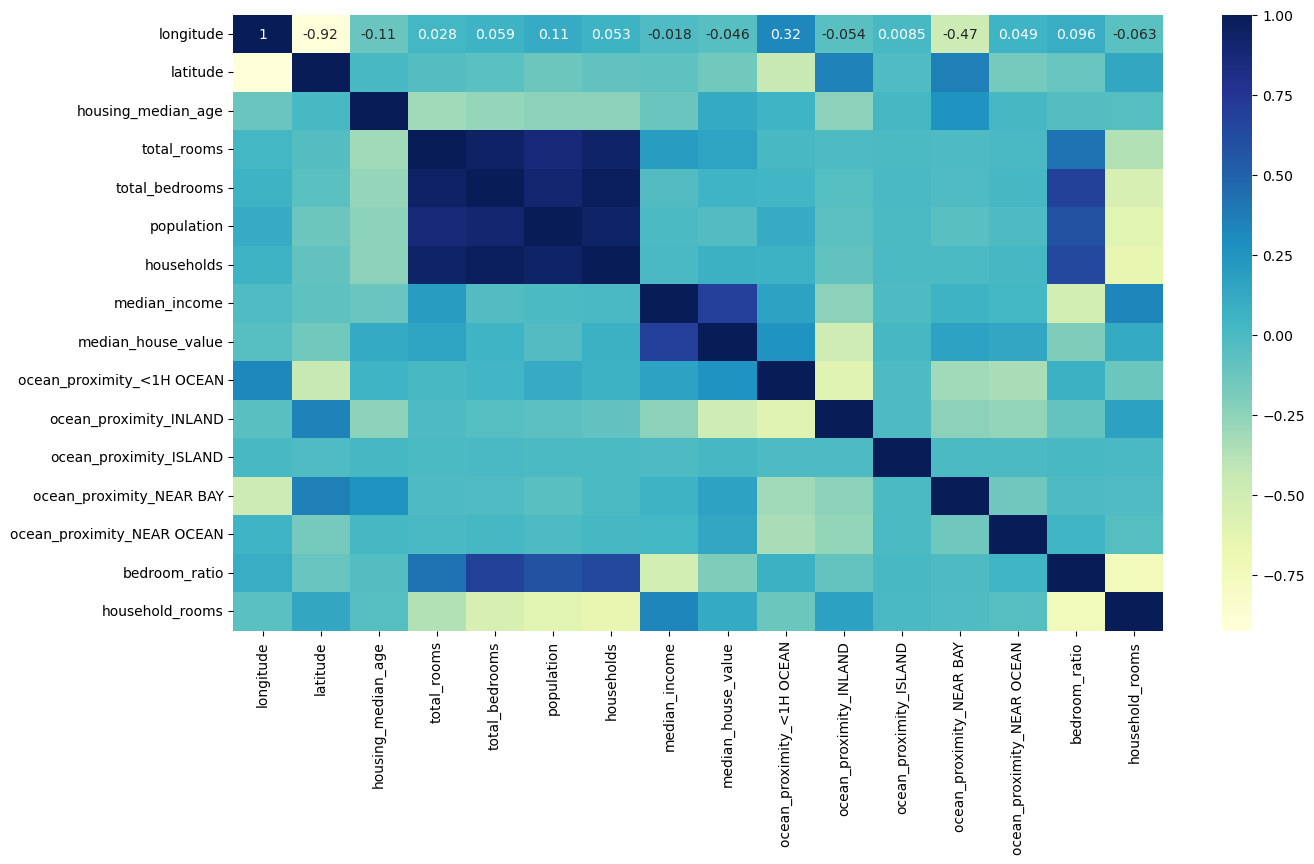

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True,cmap="YlGnBu")

In [20]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [21]:
from sklearn.linear_model import LinearRegression
x_train=train.drop(['median_house_value'],axis=1)
y_train=train['median_house_value']
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
#score=lr.score(x_test,y_test)
#score

In [23]:
test=x_test.join(y_test)

test['total_rooms']=np.log(test['total_rooms']+1)
test['total_bedrooms']=np.log(test['total_bedrooms']+1)
test['population']=np.log(test['population']+1)
test['households']=np.log(test['households']+1)

test = test.join(pd.get_dummies(test['ocean_proximity'], prefix='ocean_proximity')).drop(['ocean_proximity'], axis=1)

test['bedroom_ratio']=test['total_bedrooms']/test['total_rooms']
test['household_rooms']=test['total_rooms']/test['households']

x_test=test.drop(['median_house_value'],axis=1)
y_test=test['median_house_value']

In [24]:
score=lr.score(x_train,y_train)





score

0.6706905217074816

### Random Forest Regression

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [26]:

rfr.score(x_train,y_train)

0.9742917905567945

In [27]:
from sklearn.linear_model import LogisticRegression
x_train=train.drop(['median_house_value'],axis=1)
y_train=train['median_house_value']

In [28]:
lm=LogisticRegression()
lm.fit(x_train,y_train)

C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [29]:
lm.score(x_train,y_train)

0.051327541906276766

In [30]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [31]:
dtr.score(x_train,y_train)

1.0

In [32]:
pip install GradientBoostingRegressor

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement GradientBoostingRegressor (from versions: none)
ERROR: No matching distribution found for GradientBoostingRegressor


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [34]:
knc = KNeighborsRegressor()
rfr=RandomForestRegressor()
dtc = DecisionTreeRegressor(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
abc = AdaBoostRegressor(n_estimators=50, random_state=2)
bc = BaggingRegressor(n_estimators=50, random_state=2)
svr=SVR(kernel='sigmoid',gamma=1.0)
etr=ExtraTreesRegressor(n_estimators=50,random_state=2)
lr=LinearRegression()

In [35]:
clfs = {
    'K Nearest Neighbour Regressor' : knc, 
    'Decision Tree Regressor': dtc, 
    'Linear Regression': lr,
    'Logistic Regression': lrc,  
    'AdaBoost Regressor': abc, 
    'Bagging Regressor': bc,
    'SVR':svr,
    'Random Forest Regressor':rfr,
    'ExtraTreesRegressor':etr
    }

In [36]:
#from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clf, x_train, y_train):
    clf.fit(x_train, y_train)
    score=clf.score(x_train,y_train)
    return score

In [ ]:
#accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    precision=train_classifier(clf, x_train, y_train )
    
    print("For ",name)
   
    print("Precision - ",precision)
    
   
    precision_scores.append(precision)

For  K Nearest Neighbour Regressor
Precision -  0.7847024978179495
For  Decision Tree Regressor
Precision -  0.6418287989265303
For  Linear Regression
Precision -  0.6706905217074816


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df


In [ ]:
import pickle

with open("house_price_.pkl", "wb") as file:
    pickle.dump(etr, file)


In [ ]:
latitude = float(input("Enter latitude[30,42]: "))
longitude = float(input("Enter longitude[-124,-110]: "))
housing_median_age = float(input("Enter house median age[0.52]: "))
total_rooms = float(input("Enter total rooms[1,10]: "))
total_bedrooms = float(input("Enter total bedrooms[0,10]: "))
population = float(input("Enter population[0,10]: "))
households = float(input("Enter households[0,10]: "))
median_income = float(input("Enter median income[0,15]: "))
ocean_proximity = input("Enter ocean proximity (1 for <1H OCEAN, 2 for INLAND, 3 for ISLAND, 4 for NEAR BAY, 5 for NEAR OCEAN): ")
bedroom_ratio = float(total_bedrooms) / float(total_rooms)
household_rooms = float(total_rooms) / float(households)

input_data = pd.DataFrame({  
    'longitude': [longitude],
    'latitude': [latitude],
    'housing_median_age': [housing_median_age],
    'total_rooms': [total_rooms],
    'total_bedrooms': [total_bedrooms],
    'population': [population],
    'households': [households],
    'median_income': [median_income],
    'ocean_proximity_<1H OCEAN': [1 if ocean_proximity == '1' else 0],
    'ocean_proximity_INLAND': [1 if ocean_proximity == '2' else 0],
    'ocean_proximity_ISLAND': [1 if ocean_proximity == '3' else 0],
    'ocean_proximity_NEAR BAY': [1 if ocean_proximity == '4' else 0],
    'ocean_proximity_NEAR OCEAN': [1 if ocean_proximity == '5' else 0],
    'bedroom_ratio':[bedroom_ratio],
    'household_rooms':[household_rooms]
})
predicted_price = etr.predict(input_data)
print(f"The predicted price of the house is: ${predicted_price}")

In [ ]:
print(train['latitude'].min())
train['latitude'].max()


In [ ]:
print(train['longitude'].min())
train['longitude'].max()


In [ ]:
print(train['housing_median_age'].min())
train['housing_median_age'].max()


In [ ]:
print(train['total_rooms'].min())
train['total_rooms'].max()


In [ ]:
df['total_rooms'].min()

In [ ]:
df['total_rooms'].max()

In [ ]:
df['total_bedrooms'].max()

In [ ]:
df['median_income'].min()